# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
all_classes = list(set(y_train))
n_classes = len(all_classes)

print("Number of classes             =", n_classes)
print("Image data shape              =", image_shape)
print("Number of training examples   =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples    =", n_test)
print("Number of training labels     =", len(y_train))
print("Number of validation labels   =", len(y_valid))
print("Number of testing labels      =", len(y_test))



Number of classes             = 43
Image data shape              = (32, 32, 3)
Number of training examples   = 34799
Number of validation examples = 4410
Number of testing examples    = 12630
Number of training labels     = 34799
Number of validation labels   = 4410
Number of testing labels      = 12630


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Image size =  (32, 32, 3)


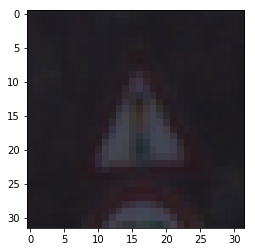

Image size =  (32, 32, 3)


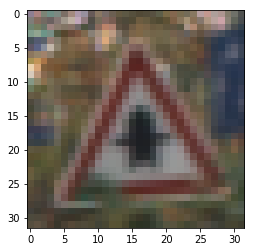

Image size =  (32, 32, 3)


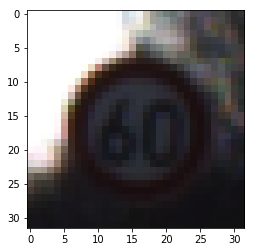

Image size =  (32, 32, 3)


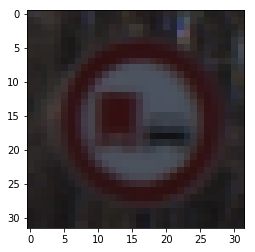

Image size =  (32, 32, 3)


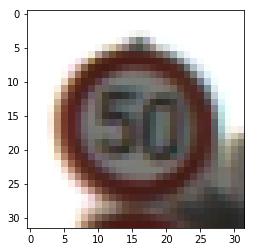

Sign occurrences in train set      = {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210} 

Sign occurrences in validation set = {0: 30, 1: 240, 2: 240, 3: 150, 4: 210, 5: 210, 6: 60, 7: 150, 8: 150, 9: 150, 10: 210, 11: 150, 12: 210, 13: 240, 14: 90, 15: 90, 16: 60, 17: 120, 18: 120, 19: 30, 20: 60, 21: 60, 22: 60, 23: 60, 24: 30, 25: 150, 26: 60, 27: 30, 28: 60, 29: 30, 30: 60, 31: 90, 32: 30, 33: 90, 34: 60, 35: 120, 36: 60, 37: 30, 38: 210, 39: 30, 40: 60, 41: 30, 42: 30} 

Sign occurrences in testing set    = {0: 60, 1: 720, 2: 750, 3: 450, 4: 660, 5: 630, 6: 150, 7: 450, 8: 450, 9: 480, 10: 660, 11: 420, 12: 690, 13: 720, 14: 270, 15: 210, 16: 1

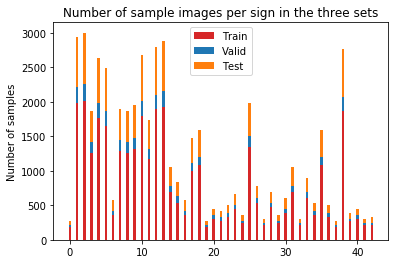

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
    
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize a few random images to verify data is read correctly
for ex in range(5):
    r = np.random.uniform(0,n_train,1)
    im = np.array(X_train[int(r)])
    print("Image size = ",im.shape)
    plt.imshow(im)
    plt.show()

# Plot image samples per class in the training set
occur_train = {}
for idx in range(n_classes):
    find = (y_train==idx)
    count = sum(find)
    occur_train[idx] = count

# Plot image samples per class in the validation set
occur_valid = {}
for idx in range(n_classes):
    find = (y_valid==idx)
    count = sum(find)
    occur_valid[idx] = count

# Plot image samples per class in the testing set
occur_test = {}
for idx in range(n_classes):
    find = (y_test==idx)
    count = sum(find)
    occur_test[idx] = count

# Print the size of each set per sign
print("Sign occurrences in train set      =", occur_train,"\n")
print("Sign occurrences in validation set =", occur_valid,"\n")
print("Sign occurrences in testing set    =", occur_test ,"\n")

# Visualize the numbers using a stacked bar chart
width = 0.35
ind = np.arange(n_classes)
p1_vals  = list(occur_train.values())
p2_vals  = list(occur_valid.values())
p12_vals = list(np.add(p1_vals,p2_vals))
p3_vals  = list(occur_test.values())
p1 = plt.bar(ind, p1_vals, width, color='#d62728')
p2 = plt.bar(ind, p2_vals, width, bottom=p1_vals)
p3 = plt.bar(ind, p3_vals, width, bottom=p12_vals)
plt.ylabel('Number of samples')
plt.title('Number of sample images per sign in the three sets')
plt.legend((p1[0], p2[0], p3[0]), ('Train', 'Valid','Test'))
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Generating Additional Training Data (Class - 0 )
For this class,  457  new images will be generated
... Done
Generating Additional Validation Data (Class - 0 )
For this class,  52  new images will be generated
... Done
Generating Additional Testing Data (Class - 0 )
For this class,  172  new images will be generated
... Done
Generating Additional Training Data (Class - 1 )
For this class,  7  new images will be generated
... Done
Generating Additional Validation Data (Class - 1 )
For this class,  0  new images will be generated
... Done
Generating Additional Testing Data (Class - 1 )
For this class,  7  new images will be generated
... Done
Generating Additional Training Data (Class - 2 )
For this class,  0  new images will be generated
... Done
Generating Additional Validation Data (Class - 2 )
For this class,  0  new images will be generated
... Done
Generating Additional Testing Data (Class - 2 )
For this class,  0  new images will be generated
... Done
Generating Additional Trainin

... Done
Generating Additional Validation Data (Class - 25 )
For this class,  22  new images will be generated
... Done
Generating Additional Testing Data (Class - 25 )
For this class,  67  new images will be generated
... Done
Generating Additional Training Data (Class - 26 )
For this class,  367  new images will be generated
... Done
Generating Additional Validation Data (Class - 26 )
For this class,  45  new images will be generated
... Done
Generating Additional Testing Data (Class - 26 )
For this class,  142  new images will be generated
... Done
Generating Additional Training Data (Class - 27 )
For this class,  450  new images will be generated
... Done
Generating Additional Validation Data (Class - 27 )
For this class,  52  new images will be generated
... Done
Generating Additional Testing Data (Class - 27 )
For this class,  172  new images will be generated
... Done
Generating Additional Training Data (Class - 28 )
For this class,  382  new images will be generated
... Done
Ge

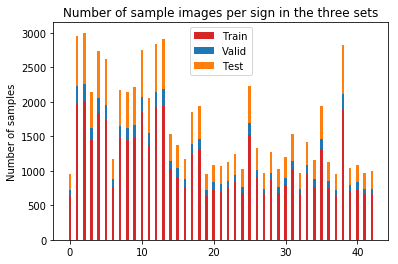

Done augmenting data set


In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2  #bringing in OpenCV libraries

############################################
# Generate distorted imagery from original #
############################################
def GenDistortedImage( method, original ):
    
    # Image size
    rows = original.shape[0]
    cols = original.shape[1]
    
    distorted = original
    
    # Replace transformations below with a Gaussian blur - LeNet gets confused
    if method is 'affline' or method is 'perspective':
        method = 'blur'
        
    # Distort original image according to the method specified
    if method is 'blur':
        # Apply Gaussian blur
        ksize = (3,3)
        distorted = cv2.GaussianBlur(original, ksize, 0.5, 0.5)
        #print('Gaussian Blur')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
    elif method is 'affline':
        # Perform affline transformation
        pts1 = np.float32([[5,5],[20,5],[5,20]])
        pts2 = np.float32([[1,10],[20,5],[10,25]])
        M = cv2.getAffineTransform(pts1,pts2)
        distorted = cv2.warpAffine(original,M,(cols,rows))
        #print('Affline Transformation')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
    elif method is 'perspective':
        # Perform perspective transformation
        pts1 = np.float32([[5,10],[8,20],[20,5],[25,25]])
        pts2 = np.float32([[10,10],[13,25],[25,0],[30,25]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        distorted = cv2.warpPerspective(original,M,(cols,rows))
        #print('Perspective Transformation')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
    elif method is 'brightness':
        # Adjust the brightness
        beta = 2.0
        distorted = np.array(original)+beta
        #print('Brightness')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
    elif method is 'contrast':
        # Enhance the contrast
        alpha = 3.0
        distorted = np.array(original)*alpha
        #print('Contrast')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
    elif method is 'rotation':
        # Rotate image at a random angle
        angle = (np.random.random()-0.5)*30
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        distorted = cv2.warpAffine(original,M,(cols,rows))
        #print('Rotation')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
    elif method is 'translation':
        # Perform a random shift in x and y direction, 
        # left or right, up or down respectively (max is set to 5 pixels)
        max_shift = 2
        shiftx = 2*max_shift*(np.random.random()-0.5)
        shifty = 2*max_shift*(np.random.random()-0.5)
        M = np.float32([[1,0,shiftx],[0,1,shifty]])
        distorted = cv2.warpAffine(original,M,(cols,rows))
        #print('Translation')
        #plt.imshow(distorted, cmap='gray')
        #plt.show()
        
    return distorted

######################################
# PROC STEP 1 - Convert to grayscale #
######################################

# Convert train set to grayscale
X_train_gray = []
for i in range(n_train):
    gray = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY) #grayscale conversion
    X_train_gray.append(gray)
    
# Convert to numpy array    
X_train_gray = np.array(X_train_gray)

# Convert validation set to grayscale
X_valid_gray = []
for i in range(n_validation):
    gray = cv2.cvtColor(X_valid[i], cv2.COLOR_RGB2GRAY) #grayscale conversion
    X_valid_gray.append(gray)

# Convert to numpy array        
X_valid_gray = np.array(X_valid_gray)

# Convert test set to grayscale
X_test_gray = []
for i in range(n_test):
    gray = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY) #grayscale conversion
    X_test_gray.append(gray)
    
# Convert to numpy array    
X_test_gray = np.array(X_test_gray)

########################################################
# PROC STEP 2 - Normalize to 0-mean and equal variance #
########################################################

# Use the mid-point of the 8-bit dynamic range for normalization
half_dyn_range = 2.0**8.0 / 2.0

# Normalize train set (-1 to 1)
X_train_gray_norm = []
for i in range(n_train):
    img = (X_train_gray[i] - half_dyn_range) / half_dyn_range
    X_train_gray_norm.append(img)
    
# Convert to numpy array    
X_train_gray_norm = np.array(X_train_gray_norm)

# Normalize validation set (-1 to 1)
X_valid_gray_norm = []
for i in range(n_validation):
    img = (X_valid_gray[i] - half_dyn_range) / half_dyn_range
    X_valid_gray_norm.append(img)

# Convert to numpy array        
X_valid_gray_norm = np.array(X_valid_gray_norm)

# Normalize test set (-1 to 1)
X_test_gray_norm = []
for i in range(n_test):
    img = (X_test_gray[i] - half_dyn_range) / half_dyn_range
    X_test_gray_norm.append(img)
    
# Convert to numpy array    
X_test_gray_norm = np.array(X_test_gray_norm)

#############################################################
# PROC STEP 3 - Generate more data to repair sample gaps    #
#               between classes - distort/blur/rotate/shift #
#############################################################

# List supported data enhancement methods
method = ['blur','affline','perspective','brightness','contrast','rotation','translation']

# Define new arrays to store the enhanced label sets
y_train_enhanced = y_train
y_valid_enhanced = y_valid
y_test_enhanced  = y_test

for i in range(n_classes):

    ### ------------- Generate Additional Training Data ------------- ###
    
    print('Generating Additional Training Data (Class -',i,')')
    
    # Generate validation examples
    label_set = y_train_enhanced
    image_set = X_train_gray_norm
    delta = max(occur_train.values()) - occur_train[i]
    delta = int((25./100.0)*delta)
    print('For this class, ',delta,' new images will be generated')
    for ex in range(delta):        
        # Pick a data enhancement method
        m = np.random.randint(0,len(method),1)
        m = m[0]
                        
        # Pick an existing example of this class randomly        
        idxlist = np.argwhere( y_train == i )
        idx = np.random.randint(0,len(idxlist),1)
        idx = idx[0]
        
        # Generate a distored image and add it to the set
        dist = GenDistortedImage( method[m], X_train_gray_norm[idx] )
        
        # Update the stats in the dictionary
        occur_train[i] += 1
        
        # Update the label set
        label_set = np.append(label_set,y_train_enhanced[idx])

        # Add new image to the image set
        image_set = np.append(image_set,dist)

        #print('Original - train')
        #plt.imshow(X_train_gray_norm[idx],cmap='gray')
        #plt.show()
        #print('Distorted  - train (method = ',method[m],')')
        #plt.imshow(dist,cmap='gray')
        #plt.show()
    
    # Reshape the label and image sets
    y_train_enhanced = np.reshape(label_set,(delta+y_train_enhanced.shape[0],1))
    X_train_gray_norm = np.reshape(image_set,(delta+X_train_gray_norm.shape[0],X_train_gray_norm.shape[1],X_train_gray_norm.shape[2]))
    print('... Done')
            
    ### ------------- Generate Additional Validation Data ------------- ###
    
    print('Generating Additional Validation Data (Class -',i,')')

    # Generate validation examples
    label_set = y_valid_enhanced
    image_set = X_valid_gray_norm
    delta = max(occur_valid.values()) - occur_valid[i]
    delta = int((25./100.0)*delta)
    print('For this class, ',delta,' new images will be generated')
    for ex in range(delta):        
        # Pick a data enhancement method
        m = np.random.randint(0,len(method),1)
        m = m[0]
                
        # Pick an existing example of this class randomly
        idxlist = np.argwhere( y_valid == i )
        idx = np.random.randint(0,len(idxlist),1)
        idx = idx[0]

        # Generate a distored image and add it to the set
        dist = GenDistortedImage( method[m], X_valid_gray_norm[idx] )
        
        # Update the stats in the dictionary
        occur_valid[i] += 1

        # Update the label set
        label_set = np.append(label_set,y_valid_enhanced[idx])

        # Add new image to the image set
        image_set = np.append(image_set,dist)

        #print('Original - valid')
        #plt.imshow(X_valid_gray_norm[idx],cmap='gray')
        #plt.show()
        #print('Distorted - valid (method = ',method[m],')')
        #plt.imshow(dist,cmap='gray')
        #plt.show()
        
    # Reshape the label and image sets
    y_valid_enhanced = np.reshape(label_set,(delta+y_valid_enhanced.shape[0],1))
    X_valid_gray_norm = np.reshape(image_set,(delta+X_valid_gray_norm.shape[0],X_valid_gray_norm.shape[1],X_valid_gray_norm.shape[2]))
    print('... Done')
 
    ### ------------- Generate Additional Testing Data ------------- ###

    print('Generating Additional Testing Data (Class -',i,')')

    # Generate testing examples
    label_set = y_test_enhanced
    image_set = X_test_gray_norm
    delta = max(occur_test.values()) - occur_test[i]
    delta = int((25./100.0)*delta)
    print('For this class, ',delta,' new images will be generated')
    for ex in range(delta):
        # Pick a data enhancement method
        m = np.random.randint(0,len(method),1)
        m = m[0]
        
        # Pick an existing example of this class randomly
        idxlist = np.argwhere( y_test == i )
        idx = np.random.randint(0,len(idxlist),1)
        idx = idx[0]
        
        # Generate a distored image and add it to the set
        dist = GenDistortedImage( method[m], X_test_gray_norm[idx] )
        
        # Update the stats in the dictionary
        occur_test[i] += 1
        
        # Update the label set
        label_set = np.append(label_set,y_test_enhanced[idx])

        # Add the new image to the image set
        image_set = np.append(image_set,dist)

        #print('Original - test')
        #plt.imshow(X_test_gray_norm[idx],cmap='gray')
        #plt.show()
        #print('Distorted - test (method = ',method[m],')')
        #plt.imshow(dist,cmap='gray')
        #plt.show()
        
    # Reshape the labels and image sets
    y_test_enhanced = np.reshape(label_set,(delta+y_test_enhanced.shape[0],1))
    X_test_gray_norm = np.reshape(image_set,(delta+X_test_gray_norm.shape[0],X_test_gray_norm.shape[1],X_test_gray_norm.shape[2]))
    print('... Done')

print("Number of classes                      =", n_classes)
print("Image data shape                       =", X_train_gray_norm[0].shape)
print("Number of original training examples   =", len(X_train          ))
print("Number of enhanced training examples   =", len(X_train_gray_norm))
print("Number of enhanced training labels     =", len(y_train_enhanced) )
print("Number of original validation examples =", len(X_valid          ))
print("Number of enhanced validation examples =", len(X_valid_gray_norm))
print("Number of enhanced validation labels   =", len(y_valid_enhanced) )
print("Number of original testing examples    =", len(X_test)           )
print("Number of enhanced testing examples    =", len(X_test_gray_norm) )
print("Number of enhanced testing labels      =", len(y_test_enhanced)  )

# Visualize the numbers using a stacked bar chart
width = 0.35
ind = np.arange(n_classes)
p1_vals  = list(occur_train.values())
p2_vals  = list(occur_valid.values())
p12_vals = list(np.add(p1_vals,p2_vals))
p3_vals  = list(occur_test.values())
p1 = plt.bar(ind, p1_vals, width, color='#d62728')
p2 = plt.bar(ind, p2_vals, width, bottom=p1_vals)
p3 = plt.bar(ind, p3_vals, width, bottom=p12_vals)
plt.ylabel('Number of samples')
plt.title('Number of sample images per sign in the three sets')
plt.legend((p1[0], p2[0], p3[0]), ('Train', 'Valid','Test'))
plt.show()

print('Done augmenting data set')


### Model Architecture

In [28]:
# Shuffle data
from sklearn.utils import shuffle

# Assign generated data to train set
X_train = np.reshape(X_train_gray_norm,(X_train_gray_norm.shape[0],X_train_gray_norm.shape[1],X_train_gray_norm.shape[2],1))
y_train = np.reshape(y_train_enhanced,(y_train_enhanced.shape[0],))

X_valid = np.reshape(X_valid_gray_norm,(X_valid_gray_norm.shape[0],X_valid_gray_norm.shape[1],X_valid_gray_norm.shape[2],1))
y_valid = np.reshape(y_valid_enhanced,(y_valid_enhanced.shape[0],))

X_test = np.reshape(X_test_gray_norm,(X_test_gray_norm.shape[0],X_test_gray_norm.shape[1],X_test_gray_norm.shape[2],1))
y_test = np.reshape(y_test_enhanced,(y_test_enhanced.shape[0],))

X_train, y_train = shuffle(X_train, y_train)


In [29]:
# Set up TensorFlow
import tensorflow as tf

DEPTH = 1
EPOCHS = 12
BATCH_SIZE = 128

In [30]:
# Implement the LeNet architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, DEPTH, 36), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(36))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 36, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [31]:
# Features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, DEPTH))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the model
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
#with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Train      Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

# Compute accuracy from test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Train      Accuracy = 0.938
Validation Accuracy = 0.846

EPOCH 2 ...
Train      Accuracy = 0.977
Validation Accuracy = 0.915

EPOCH 3 ...
Train      Accuracy = 0.980
Validation Accuracy = 0.923

EPOCH 4 ...
Train      Accuracy = 0.984
Validation Accuracy = 0.900

EPOCH 5 ...
Train      Accuracy = 0.996
Validation Accuracy = 0.899

EPOCH 6 ...
Train      Accuracy = 0.995
Validation Accuracy = 0.943

EPOCH 7 ...
Train      Accuracy = 0.998
Validation Accuracy = 0.913

EPOCH 8 ...
Train      Accuracy = 0.998
Validation Accuracy = 0.918

EPOCH 9 ...
Train      Accuracy = 0.995
Validation Accuracy = 0.881

EPOCH 10 ...
Train      Accuracy = 0.999
Validation Accuracy = 0.957

EPOCH 11 ...
Train      Accuracy = 0.997
Validation Accuracy = 0.935

EPOCH 12 ...
Train      Accuracy = 0.999
Validation Accuracy = 0.940

Model saved
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.919


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

The selected images are grayscaled and normalized to a 0-mean and equal variance:


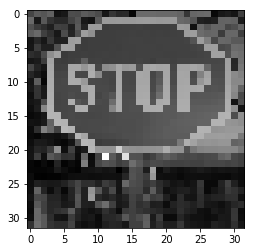

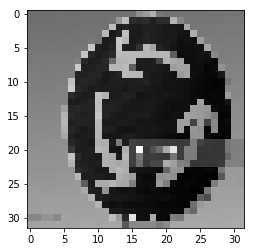

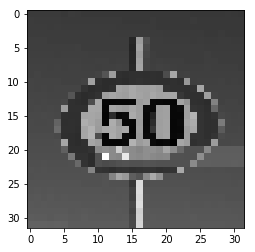

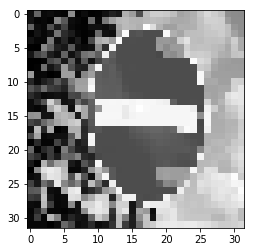

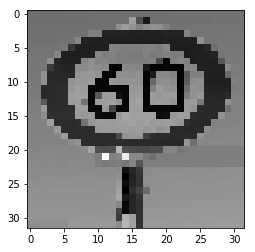

In [33]:
### Load the images and plot them here.
BATCH_SIZE = 5

# Numpy arrays to store images and correct interpretation of street signs
X_images = np.array([])
y_images = np.array([])

# Define the list of images
pathToImages = './images/'
imageList = ['sign1.jpg','sign2.jpg','sign3.jpg','sign4.jpg','sign5.jpg']
#imageList = ['sign9.jpg','sign10.jpg','sign11.jpg','sign12.jpg','sign13.jpg']

# Correct interpretation of the signs
y_truth = np.array([14, 40, 2, 17, 3])
#y_truth = np.array([7, 37, 41, 24, 2])

# For each item on the list of images, convert grayscale and normalize as before
# Use the mid-point of the 8-bit dynamic range for normalization
half_dyn_range = 2.0**8.0 / 2.0

# Image dimensions variables
w = h = 0
orig_w = orig_h = 32

print('The selected images are grayscaled and normalized to a 0-mean and equal variance:')
for image in imageList:
    # Read the BGR images and apply a similar pipeline as before
    img = cv2.imread(pathToImages+image)
    # Convert from BGR to RGB
    rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Convert from RGB to Grayscale
    grayImg = cv2.cvtColor(rgbImg, cv2.COLOR_RGB2GRAY)
    # Normalize
    finalImg = (grayImg - half_dyn_range) / half_dyn_range
    #plt.imshow(finalImg,cmap='gray')
    #plt.show()
    
    # Resize the images to 32x32
    finalImg32 = cv2.resize(finalImg,(orig_w, orig_h), interpolation = cv2.INTER_CUBIC)
    X_images = np.append(X_images, finalImg32)
    plt.imshow(finalImg32, cmap='gray')
    plt.show()
    
X_images = np.reshape(X_images,(len(y_truth),orig_w,orig_h,1))

### Predict the Sign Type for Each Image

In [34]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)

print('Softmax probabilities for each image:')
prediction = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(len(X_images)):
        image = np.reshape(X_images[i],(1,orig_w,orig_h,1))        
        interpretation = y_truth[i]
        p = sess.run(softmax, feed_dict={x: image, y: interpretation})
        prediction = np.append(prediction,p)
        print(p)
prediction = np.reshape(prediction,(len(X_images),n_classes))        

Softmax probabilities for each image:
[[ 0.01237109  0.04987051  0.01841862  0.06624988  0.01058808  0.008746
   0.03432147  0.01463496  0.01030479  0.03539531  0.01557469  0.02272548
   0.01825537  0.01979977  0.02218131  0.00443442  0.01494637  0.02518527
   0.00440307  0.02420916  0.04324779  0.01962776  0.0189375   0.04471519
   0.01745092  0.00658461  0.01636318  0.08703978  0.09829857  0.02136455
   0.00354891  0.00612879  0.00470662  0.00861564  0.01258201  0.0186863
   0.01052396  0.00682517  0.03851385  0.0044849   0.04056719  0.02884912
   0.00972212]]
[[ 0.00910714  0.02031153  0.03153617  0.06612531  0.00629909  0.00575606
   0.02046523  0.01915032  0.01217689  0.01211806  0.00599855  0.03799279
   0.01019113  0.01507649  0.04480893  0.00291483  0.00814983  0.01781655
   0.00699279  0.02679289  0.0802075   0.00743975  0.0077161   0.05473807
   0.01470039  0.0054975   0.0129242   0.1619356   0.12016142  0.01091853
   0.00159994  0.00268864  0.00134797  0.00346668  0.00675253

### Analyze Performance

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    accuracy = evaluate(X_images, y_truth)
    print("Prediction Accuracy = {:.3f}".format(accuracy))



Prediction Accuracy = 0.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [42]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for p in prediction:
    p_sort = np.sort(p)
    p_sort = p_sort[::-1]
    p_max_idx = np.argwhere(p==np.max(p))[0][0]
    print('The top five softmax probabilities are: ',p_sort[0:5])
    print('The LeNet prediction for this sign is : ',p_max_idx)

The top five softmax probabilities are:  [ 0.09829857  0.08703978  0.06624988  0.04987051  0.04471519]
The LeNet prediction for this sign is :  28
The top five softmax probabilities are:  [ 0.1619356   0.12016142  0.0802075   0.06612531  0.05473807]
The LeNet prediction for this sign is :  27
The top five softmax probabilities are:  [ 0.12122423  0.08960488  0.07059897  0.05991459  0.05447845]
The LeNet prediction for this sign is :  28
The top five softmax probabilities are:  [ 0.10702604  0.0965544   0.08664037  0.05574     0.05382201]
The LeNet prediction for this sign is :  27
The top five softmax probabilities are:  [ 0.13054362  0.08168478  0.07448561  0.05778702  0.0572295 ]
The LeNet prediction for this sign is :  28


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [14]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")